# Data Analysis Tools Week 2



In [1]:
!pip install pandas seaborn scipy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

 
import pandas as pd
import seaborn as sns
import scipy.stats
 
data2 = pd.read_csv('./gapminder.csv', low_memory=False)

Set the variables to numeric

In [3]:
data2['internetuserate'] = pd.to_numeric(data2['internetuserate'], errors='coerce')
data2['polityscore'] = pd.to_numeric(data2['polityscore'], errors='coerce')
 
sub1 = data2.copy()

Create dataframe with NAs dropped and internetuserate binned to be 'Low' and 'High,' and polityscore is binned to be 'Low,' 'Mid,' and 'High.'

In [4]:
sub3 = sub1[['internetuserate', 'polityscore']].dropna()
sub3['polityscore_binned'] = pd.cut(sub3.polityscore, 3, labels=['Low', 'Mid', 'High'])
sub3['internetuserate_binned'] = pd.cut(sub3.internetuserate, 2, labels=['Low', 'High'])

sub4 = sub3.copy()

#### Perform Chi-Square test for categorical to categorical variable comparison
 
Contingency table of observed counts

In [5]:
ct1 = pd.crosstab(sub4['internetuserate_binned'], sub4['polityscore_binned'])
ct1

polityscore_binned,Low,Mid,High
internetuserate_binned,,,
Low,23,27,62
High,5,1,37


Column percentiles

In [6]:
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
colpct

polityscore_binned,Low,Mid,High
internetuserate_binned,,,
Low,0.821429,0.964286,0.626263
High,0.178571,0.035714,0.373737


Chi-square value, p-value, expected counts

In [7]:
cs1= scipy.stats.chi2_contingency(ct1)
cs1

Chi2ContingencyResult(statistic=14.106815515141927, pvalue=0.0008644580686778272, dof=2, expected_freq=array([[20.23225806, 20.23225806, 71.53548387],
       [ 7.76774194,  7.76774194, 27.46451613]]))

Graph percent with internet use rate within each polity score group 

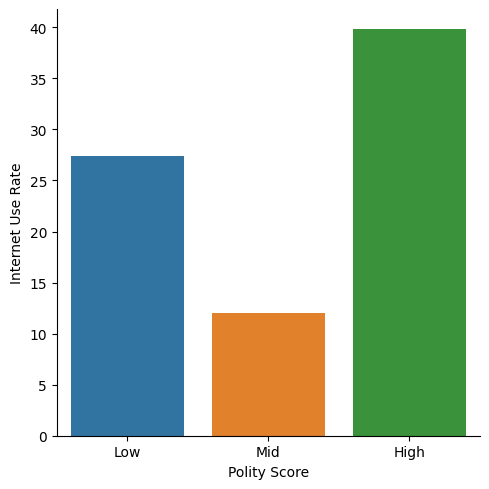

In [8]:
from matplotlib import pyplot as plt


sns.catplot(x="polityscore_binned", y="internetuserate", data=sub4, kind="bar", errorbar=None)
plt.xlabel('Polity Score')
plt.ylabel('Internet Use Rate')
plt.show()

### Perform post-hoc tests

#### Compare Low Polity Score with Mid Polity Score

In [9]:
recode1 = {'Low': 'Low', 'Mid': 'Mid'}
sub4['COMP-Low-v-Mid']= sub4['polityscore_binned'].map(recode1)

Contingency table of observed counts

In [10]:
ct2=pd.crosstab(sub4['internetuserate_binned'], sub4['COMP-Low-v-Mid'])
ct2

COMP-Low-v-Mid,Low,Mid
internetuserate_binned,,
Low,23,27
High,5,1


Column percentages

In [11]:
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
colpct

COMP-Low-v-Mid,Low,Mid
internetuserate_binned,,
Low,0.821429,0.964286
High,0.178571,0.035714


Chi-square value, p-value, expected counts

In [12]:
cs2= scipy.stats.chi2_contingency(ct2)
cs2

Chi2ContingencyResult(statistic=1.68, pvalue=0.1949244525136538, dof=1, expected_freq=array([[25., 25.],
       [ 3.,  3.]]))

#### Compare Low Polity Score with High Polity Score

In [13]:
recode2 = {'Low': 'Low', 'High': 'High'}
sub4['COMP-Low-v-High']= sub4['polityscore_binned'].map(recode2)

Contingency table of observed counts

In [14]:
ct3=pd.crosstab(sub4['internetuserate_binned'], sub4['COMP-Low-v-High'])
ct3

COMP-Low-v-High,High,Low
internetuserate_binned,,
Low,62,23
High,37,5


Column percentages

In [15]:
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
colpct

COMP-Low-v-High,High,Low
internetuserate_binned,,
Low,0.626263,0.821429
High,0.373737,0.178571


Chi-square value, p-value, expected counts

In [16]:
cs3= scipy.stats.chi2_contingency(ct3)
cs3

Chi2ContingencyResult(statistic=2.9260991012566637, pvalue=0.08715785476442026, dof=1, expected_freq=array([[66.25984252, 18.74015748],
       [32.74015748,  9.25984252]]))

#### Compare Mid Polity Score with High Polity Score

In [17]:
recode3 = {'Mid': 'Mid', 'High': 'High'}
sub4['COMP-Mid-v-High']= sub4['polityscore_binned'].map(recode3)

Contingency table of observed counts

In [18]:
ct4=pd.crosstab(sub4['internetuserate_binned'], sub4['COMP-Mid-v-High'])
ct4

COMP-Mid-v-High,High,Mid
internetuserate_binned,,
Low,62,27
High,37,1


Column percentages

In [19]:
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
colpct

COMP-Mid-v-High,High,Mid
internetuserate_binned,,
Low,0.626263,0.964286
High,0.373737,0.035714


Chi-square value, p-value, expected counts

In [20]:
cs4= scipy.stats.chi2_contingency(ct4)
cs4

Chi2ContingencyResult(statistic=10.33624298979488, pvalue=0.0013044325086655102, dof=1, expected_freq=array([[69.37795276, 19.62204724],
       [29.62204724,  8.37795276]]))